# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [58]:
#df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [181]:
#df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [97]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [98]:
df_train.shape

(15223, 52)

In [99]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [100]:
df_test.shape

(14910, 52)

In [101]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [102]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [103]:
df = df_test.append(df_train).reset_index(drop=True)

In [104]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [105]:
#df.info()

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [106]:
'''for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку'''

"for i in df_train.columns: # перебираем все столбцы\n    if str(df_train[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        print('\n') # выводим пустую строку"

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [107]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
# перекодируем

In [18]:
#df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
# проверяем

In [108]:
'''for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку'''

"for i in df.columns: # перебираем все столбцы\n    if str(df[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        print('\n') # выводим пустую строку"

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [48]:
#df.info()

In [47]:
#df.median()

In [46]:
#df.groupby('WORK_TIME').count()

In [109]:
'''df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')'''

"df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')\ndf['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')"

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
#df.info()

Да, есть, это можно посмотреть введя команду df.info() --> данных не хватает в тех столбцах, где даты меньше, 
чем RangeIndex: 30133 entries

Там где данные типа object, например, GEN_INDUSTRY, можно (один из вариантов) nan выделить в отдельную категорию (например, other - 
присвоить это всем в столбце у кого был nan) - чтобы не искажать данные

У переменной PREVIOUS_CARD_NUM_UTILIZED можно nan заменить на 0 - так следует из описания

У данных типа float можно заменить nan на медиану - это сделает значение близким к тому, которое было на самом деле 

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Да, есть - это все object кроме тех, которые на самом деле являются числами 

Их можно разбить по столбцам (количество столбцов = количеству вариантов) и заменить на 1 и 0 

Пример команды: df = pd.get_dummies(df)

Применять можно только после превращения числоваых столбцов из обджект в флоат и без столбца sample

#### Задание 3. Фунция предобработки

In [110]:
#df.info()

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [56]:
'''for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        #print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print('\n') # выводим пустую строку'''

"for i in df.columns: # перебираем все столбцы\n    if str(df[i].dtype) == 'object': # если тип столбца - object\n        print('='*10)\n        print(i) # выводим название столбца\n        #print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)\n        #print('\n') # выводим пустую строку"

In [178]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
                               
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True) # эта строка портит sample теперь норм
                               
    df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median(), inplace=True) 
                               
    df_output['GEN_INDUSTRY'].fillna('GEN_INDUSTRY_other' , inplace=True) 
    df_output['GEN_TITLE'].fillna('GEN_TITLE_other' , inplace=True)
    df_output['ORG_TP_STATE'].fillna('ORG_TP_STATE_other' , inplace=True)
    df_output['ORG_TP_FCAPITAL'].fillna('ORG_TP_FCAPITAL_other' , inplace=True)
    df_output['JOB_DIR'].fillna('JOB_DIR_other' , inplace=True)
    df_output['TP_PROVINCE'].fillna('TP_PROVINCE_other' , inplace=True)
    df_output['REGION_NM'].fillna('REGION_NM_other' , inplace=True)
    
    
                           
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS',  'GEN_INDUSTRY',\
                                                   'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',\
                                                   'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE',\
                                                   'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', \
                                                   'TP_PROVINCE', 'REGION_NM',])            
    
    # предпоследний абзац из 7 строк добавляет в sample лишние значения
                            
    return df_output

In [179]:
#df_preproc = df.pipe(preproc_data)

df_preproc = preproc_data(df)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [180]:
df_preproc.groupby('sample').count()
# почемуто после обработки функцией столбец sample портится
#df.groupby('WORK_TIME').count()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
sample,,,,,,,,,,,,,,,,,,,,,
test,14910,14910,14910,14910,14910,14910,14910,14910,14910,14910,...,14910,14910,14910,14910,14910,14910,14910,14910,14910,14910
train,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,...,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223


In [177]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 450 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(412)
memory usage: 10.3 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [189]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [190]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)



/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [192]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

## Your Code Here



0.8014013575651412

### Decision Tree Classifier

In [198]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_train_test)

accuracy_score(y_train_test, predict_dtc)

0.7996496606087147

In [200]:
predict_proba_dtc = dtc.predict_proba(X_train_test)
predict_proba_dtc

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

### Random Forest Classifier

In [201]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_train_test)

accuracy_score(y_train_test, predict_rfc)

0.8751915918546092

In [202]:
predict_proba_rfc = rfc.predict_proba(X_train_test)
predict_proba_rfc

array([[0.5, 0.5],
       [0.7, 0.3],
       [0.6, 0.4],
       ...,
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2]])

### Logistic Regression

In [203]:
lrs = LogisticRegression()
lrs.fit(X_train, y_train)
predict_lrs = lrs.predict(X_train_test)

accuracy_score(y_train_test, predict_lrs)

0.8776001751696957

In [204]:
predict_proba_lrs = lrs.predict_proba(X_train_test)
predict_proba_lrs

array([[0.71285772, 0.28714228],
       [0.9319087 , 0.0680913 ],
       [0.78048862, 0.21951138],
       ...,
       [0.93797586, 0.06202414],
       [0.89861082, 0.10138918],
       [0.96376971, 0.03623029]])

In [206]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Your Code Here
    


### Decision Tree Classifier

In [208]:
accuracy_score(y_train_test, predict_dtc)
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_train_test, predict_proba_dtc[:,1])

### Random Forest Classifier

In [209]:
accuracy_score(y_train_test, predict_rfc)
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_train_test, predict_proba_rfc[:,1])

### Logistic Regression

In [210]:
accuracy_score(y_train_test, predict_lrs)
precision_lrs, recall_lrs, thresholds_lrs = precision_recall_curve(y_train_test, predict_proba_lrs[:,1])

(-0.01, 1.01)

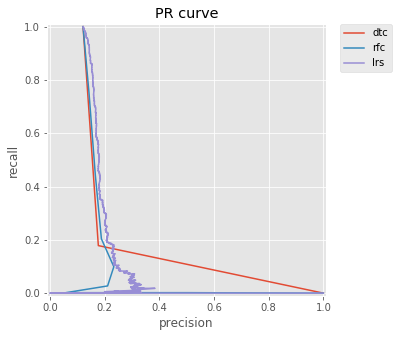

In [227]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc, label="dtc")
plt.plot(precision_rfc, recall_rfc, label="rfc")
plt.plot(precision_lrs, recall_lrs, label="lrs")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

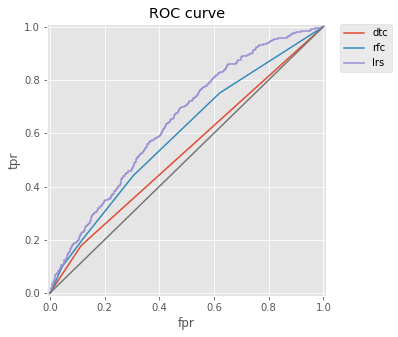

In [226]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_train_test, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_test, predict_proba_rfc[:,1])
fpr_lrs, tpr_lrs, thresholds_lrs = roc_curve(y_train_test, predict_proba_lrs[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc, label="dtc")
plt.plot(fpr_rfc, tpr_rfc, label="rfc")
plt.plot(fpr_lrs, tpr_lrs, label="lrs")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [228]:
roc_auc_score(y_train_test, predict_proba_dtc[:,1])

0.5319857993586806

In [229]:
roc_auc_score(y_train_test, predict_proba_rfc[:,1])

0.593018467121159

In [230]:
roc_auc_score(y_train_test, predict_proba_lrs[:,1])

0.6453374111898538

In [231]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

'''Зачем нужна строка сверху?'''
## Your Code Here
cv

StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

### Decision Tree Classifier

In [238]:
dtc = DecisionTreeClassifier()
a = cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
a

array([0.52792699, 0.5232318 , 0.53740097, 0.50374298, 0.57122787,
       0.53568912, 0.5303682 , 0.55001009, 0.54628153, 0.53740097])

In [237]:
np.mean(a)

0.5352249785871206

### Random Forest Classifier

In [239]:
rfc = RandomForestClassifier()
b = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
b

array([0.58057721, 0.53810097, 0.57182114, 0.6121411 , 0.58305009,
       0.56094446, 0.59721038, 0.59625043, 0.58589904, 0.64186659])

In [241]:
np.mean(b)

0.5867861402610696

### Logistic Regression

In [240]:
lrs = LogisticRegression()
c = cross_val_score(
    lrs,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
c

array([0.65717479, 0.63370373, 0.64955237, 0.65245282, 0.64914037,
       0.57997866, 0.64411814, 0.69181488, 0.67438747, 0.63245867])

In [242]:
np.mean(c)

0.6464781893976402

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [244]:
lrs = LogisticRegression()
lrs.fit(X, y)
predict_lrs = lrs.predict(X_test)

accuracy_score(y_test, predict_lrs)

0.8820925553319919

In [245]:
predict_proba_lrs = lrs.predict_proba(X_test)
predict_proba_lrs

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[0.87512698, 0.12487302],
       [0.94062466, 0.05937534],
       [0.8257333 , 0.1742667 ],
       ...,
       [0.84162998, 0.15837002],
       [0.92890164, 0.07109836],
       [0.83498321, 0.16501679]])

In [ ]:
# Померить roc_auc на тесте


In [246]:
roc_auc_score(y_test, predict_proba_lrs[:,1])

0.6434897090751194